In [1]:
import zipfile

with zipfile.ZipFile("netflix-movies-and-tv-shows.zip", "r") as zip_ref:
    zip_ref.extractall(".")


In [2]:
import pandas as pd

# Carregar o arquivo CSV descompactado
df = pd.read_csv("netflix_titles.csv")

# Exibir as primeiras linhas do dataframe
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
# Verificar as colunas disponíveis no dataframe
print(df.columns)

# Contar quantos filmes de ação, terror e ficção científica existem no catálogo
generos = ['Action', 'Horror', 'Science Fiction']

# Filtrar os filmes por gênero e contar
for genero in generos:
    count = df[df['listed_in'].str.contains(genero, case=False)].shape[0]
    print(f"Quantidade de filmes de {genero}: {count}")


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
Quantidade de filmes de Action: 1027
Quantidade de filmes de Horror: 432
Quantidade de filmes de Science Fiction: 0


Quantos títulos estão disponíveis no catálogo?

In [4]:
total_titles = df.shape[0]
print(f"Total de títulos no catálogo: {total_titles}")



Total de títulos no catálogo: 8807


Qual é a distribuição entre filmes e séries de TV?

In [5]:
tipo_distribuicao = df['type'].value_counts()
print("Distribuição entre filmes e séries de TV:")
print(tipo_distribuicao)


Distribuição entre filmes e séries de TV:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Quantos títulos são lançamentos recentes (por exemplo, dos últimos 5 anos)?

In [6]:
recent_titles = df[df['release_year'] >= 2020].shape[0]
print(f"Títulos lançados nos últimos 5 anos: {recent_titles}")


Títulos lançados nos últimos 5 anos: 1545


Quais são os gêneros mais comuns no catálogo da Netflix?

In [7]:
generos_comuns = df['listed_in'].str.split(', ').explode().value_counts().head(10)
print("Gêneros mais comuns no catálogo:")
print(generos_comuns)


Gêneros mais comuns no catálogo:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


Quantos títulos existem em cada um dos principais gêneros (Ação, Terror, Ficção Científica, etc.)?

In [8]:
generos = ['Action', 'Horror', 'Science Fiction']
for genero in generos:
    count = df[df['listed_in'].str.contains(genero, case=False)].shape[0]
    print(f"Quantidade de filmes de {genero}: {count}")


Quantidade de filmes de Action: 1027
Quantidade de filmes de Horror: 432
Quantidade de filmes de Science Fiction: 0


Quais países produzem mais conteúdo disponível no catálogo da Netflix?

In [9]:
paises_comuns = df['country'].value_counts().head(10)
print("Países que mais produzem conteúdo no catálogo da Netflix:")
print(paises_comuns)


Países que mais produzem conteúdo no catálogo da Netflix:
country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


Como os lançamentos estão distribuídos ao longo dos anos?

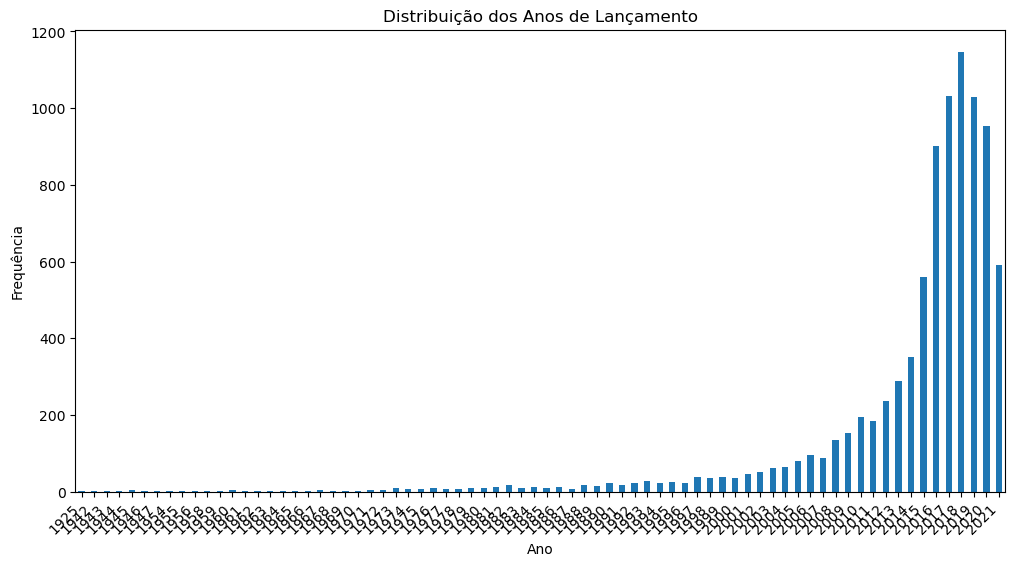

In [10]:
import matplotlib.pyplot as plt

# Criar o gráfico de barras dos anos de lançamento com rótulos rotacionados
fig, ax = plt.subplots(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='bar', ax=ax)
ax.set_title('Distribuição dos Anos de Lançamento')
ax.set_xlabel('Ano')
ax.set_ylabel('Frequência')
plt.xticks(rotation=45, ha='right')  # Rotacionar os rótulos e alinhá-los à direita
plt.show()



Qual é a média de duração dos filmes?

In [11]:
import pandas as pd

# Filtrar apenas os filmes
df_movies = df[df['type'] == 'Movie']

# Substituir valores ausentes por 0 e remover texto não relacionado à duração em minutos
df_movies['duration'] = df_movies['duration'].str.replace(' min', '').fillna('0')

# Garantir que todos os valores são números inteiros
df_movies['duration'] = df_movies['duration'].apply(lambda x: int(x) if x.isdigit() else 0)

# Calcular a média de duração dos filmes
media_duracao = df_movies['duration'].mean()
print(f"Média de duração dos filmes: {media_duracao} minutos")




Média de duração dos filmes: 99.52846191485891 minutos


C:\Users\gusta\AppData\Local\Temp\ipykernel_19612\1622317362.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].str.replace(' min', '').fillna('0')
C:\Users\gusta\AppData\Local\Temp\ipykernel_19612\1622317362.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].apply(lambda x: int(x) if x.isdigit() else 0)


Qual é a distribuição das classificações de faixa etária (ex.: TV-MA, TV-14, etc.)?

In [12]:
classificacao_faixa_etaria = df['rating'].value_counts()
print("Distribuição das classificações de faixa etária:")
print(classificacao_faixa_etaria)


Distribuição das classificações de faixa etária:
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


Quais atores ou diretores aparecem com mais frequência no catálogo da Netflix?

In [13]:
# Atores mais frequentes
atores_frequentes = df['cast'].str.split(', ').explode().value_counts().head(10)
print("Atores mais frequentes no catálogo:")
print(atores_frequentes)

# Diretores mais frequentes
diretores_frequentes = df['director'].str.split(', ').explode().value_counts().head(10)
print("Diretores mais frequentes no catálogo:")
print(diretores_frequentes)


Atores mais frequentes no catálogo:
cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64
Diretores mais frequentes no catálogo:
director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Youssef Chahine        12
Martin Scorsese        12
Name: count, dtype: int64


Criar gráficos de barras dos gêneros mais populares

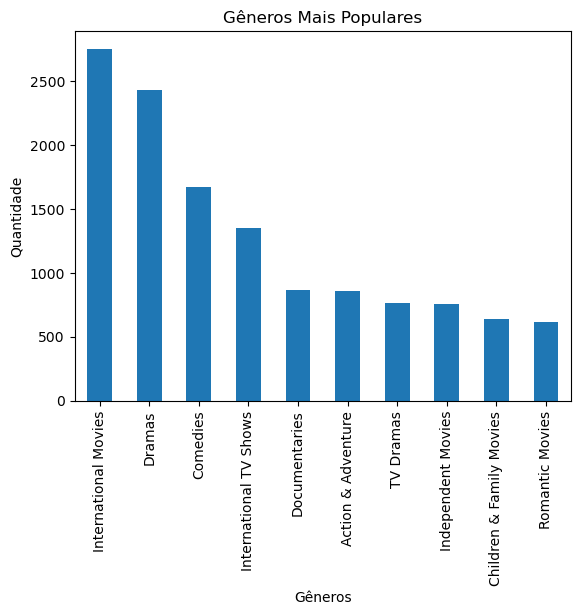

In [14]:
df['listed_in'].str.split(', ').explode().value_counts().head(10).plot(kind='bar')
plt.title('Gêneros Mais Populares')
plt.xlabel('Gêneros')
plt.ylabel('Quantidade')
plt.show()


Criar histogramas dos anos de lançamento

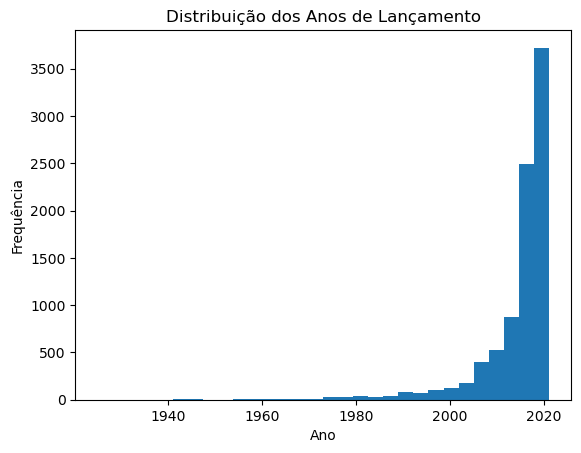

In [15]:
df['release_year'].plot(kind='hist', bins=30)
plt.title('Distribuição dos Anos de Lançamento')
plt.xlabel('Ano')
plt.ylabel('Frequência')
plt.show()


Prever o sucesso de um filme ou série com base em características específicas

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Filtrar apenas os filmes
df_movies = df[df['type'] == 'Movie'].copy()

# Remover texto não relacionado à duração em minutos e lidar com valores ausentes
df_movies['duration'] = df_movies['duration'].str.replace(' min', '')
df_movies['duration'] = pd.to_numeric(df_movies['duration'], errors='coerce').fillna(0).astype(int)

# Selecionar colunas reais para análise
X = df_movies[['release_year', 'duration']]
y = df_movies['type']  # Queremos prever se é 'Movie' (aqui só temos filmes, mas para manter o exemplo)

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo RandomForest
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calcular a acurácia
print('Acurácia:', accuracy_score(y_test, predictions))



Acurácia: 1.0
